<a href="https://colab.research.google.com/github/Kouashik07/Insurance_premium_predictor/blob/main/Estimate_Insurance_Premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Insurance Premium Prediction Project

In this project, we use the **insurance.csv** dataset to analyze the factors affecting medical insurance charges and build a machine learning model to predict premiums.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
medical_df=pd.read_csv("/content/drive/MyDrive/Sample_Datasets/insurance.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib
%matplotlib inline

In [ ]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
fig=px.histogram(medical_df,x="age",
                 marginal='box',
                 nbins=49,
                 title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medical_df,x="bmi",
                 marginal='box',
                 nbins=49,
                 color_discrete_sequence=['red'],
                 title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medical_df,
                 x="charges",
                 color="smoker",
                 color_discrete_sequence=['purple','black'],
                 marginal='box',
                 nbins=49
                 )
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medical_df,
                 x='region',
                 color='sex',
                 color_discrete_sequence=['green','black'],
                 nbins=49,
                 marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(medical_df,x='smoker',color='sex')

In [ ]:
fig=px.scatter(medical_df,x='age',y='charges',color='smoker',
               )
fig.show()

In [ ]:
px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8)

In [ ]:
px.scatter(medical_df,x='smoker',y='charges',color='smoker',
           opacity=0.8)

In [ ]:
px.violin(medical_df,x='region',y='charges',color='smoker',
           )

In [ ]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [ ]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [ ]:
# medical_df.charges.corr(medical_df.smoker)
smoker_values = {'yes': 1, 'no': 0}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric


,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [ ]:
medical_df.drop(['sex', 'smoker', 'region'], axis=1).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

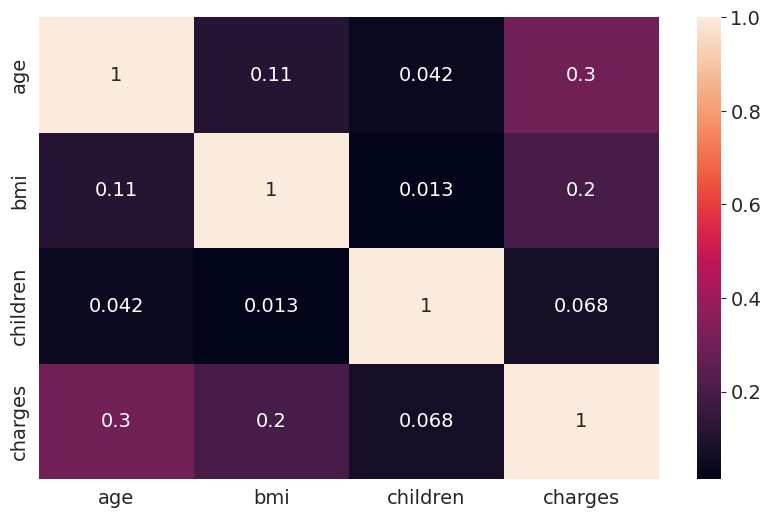

In [ ]:
sns.heatmap(medical_df.drop(['sex', 'smoker', 'region'], axis=1).corr(),annot=True)

In [ ]:
non_smoker_df=medical_df[medical_df.smoker=='no']

<Axes: xlabel='age', ylabel='charges'>

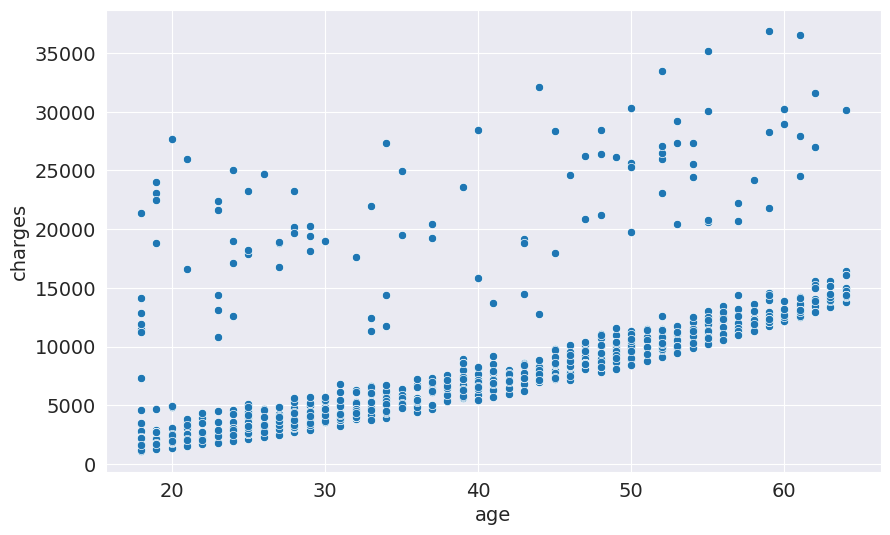

In [ ]:
sns.scatterplot(x='age',y='charges',data =non_smoker_df)

In [ ]:
def estimate_charges(age,w,b):
  return w * age + b

In [ ]:
w=50
b=100

In [ ]:
ages=non_smoker_df.age
estimated_charges=estimate_charges(ages,w,b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


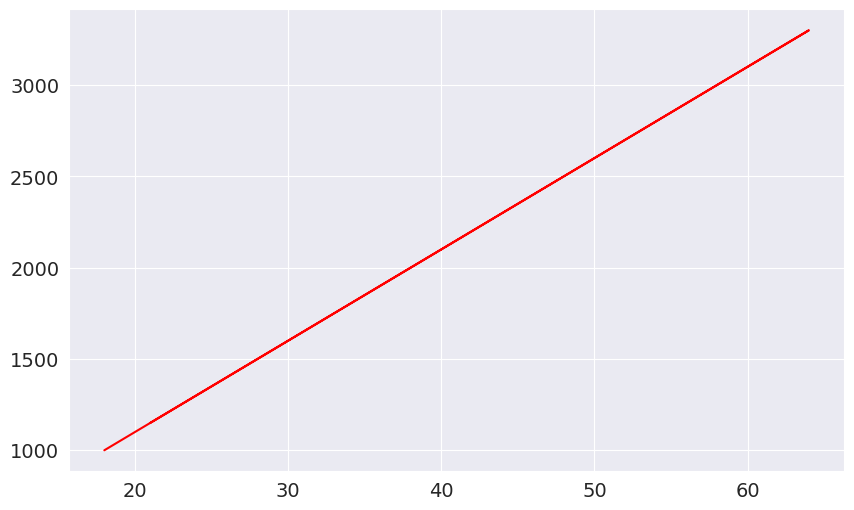

In [ ]:
plt.plot(ages,estimated_charges,color='red')
# plt.scatter(ages,estimated_charges)

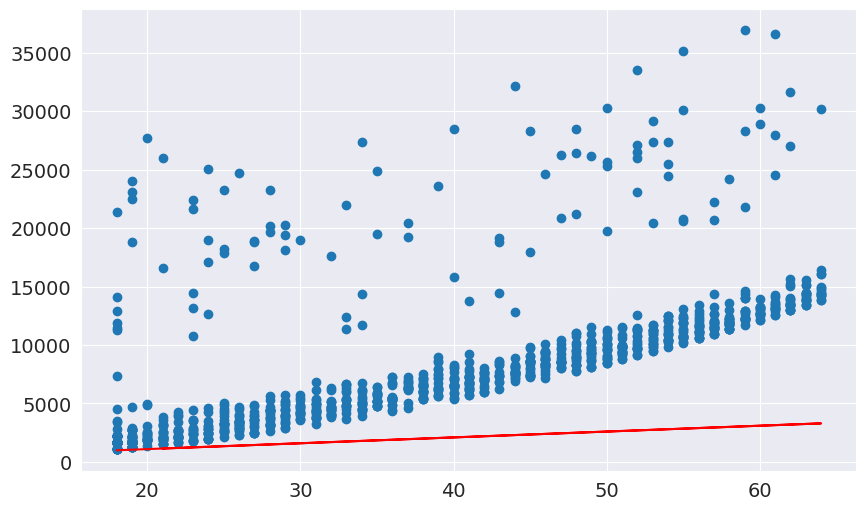

In [ ]:
plt.plot(ages,estimated_charges,color='red')
plt.scatter(ages,non_smoker_df.charges)

In [ ]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  estimated_charges=estimate_charges(ages,w,b)
  plt.plot(ages,estimated_charges,color='red')
  plt.scatter(ages,non_smoker_df.charges)

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


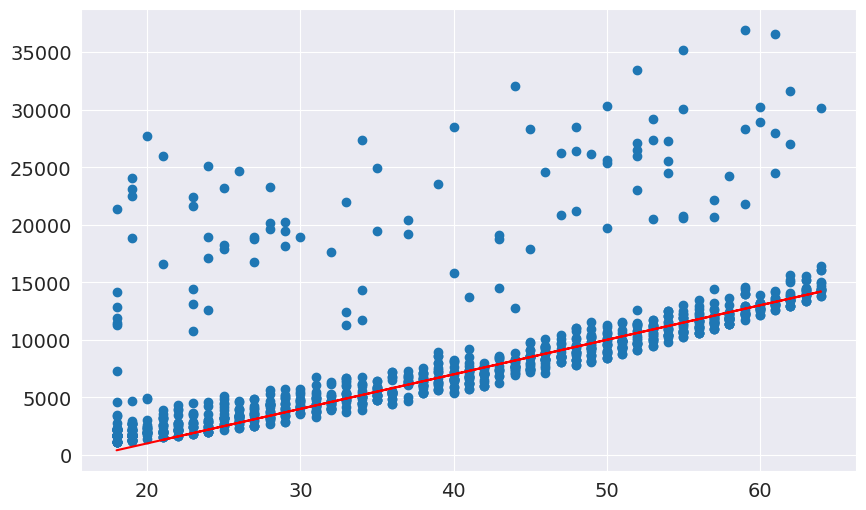

In [ ]:
try_parameters(300,-5000)
estimated_charges

In [ ]:
def rmse(predictions,targets):
  return np.sqrt(np.mean(np.square(predictions-targets)))

np.float64(4956.973980899423)

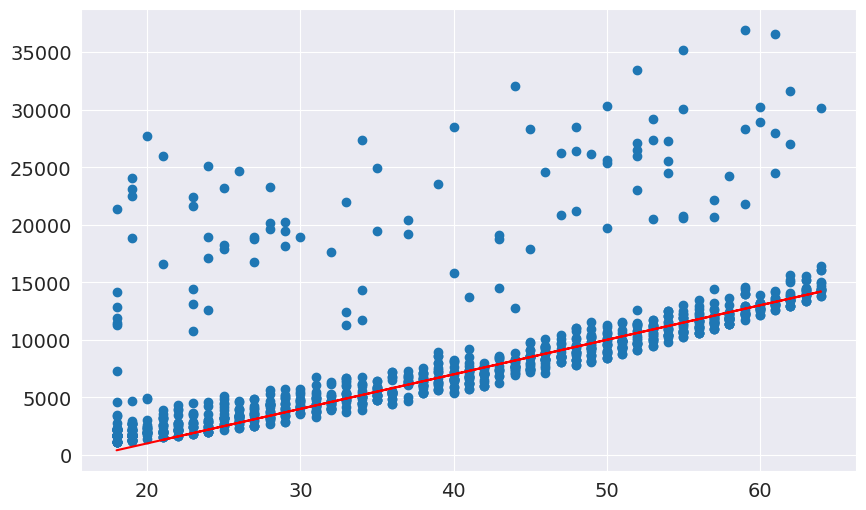

In [ ]:
try_parameters(300,-5000)
targets=non_smoker_df.charges
predictions=estimate_charges(non_smoker_df.age,300,-5000)
rmse(predictions,targets)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [ ]:
model.fit(inputs,targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],[41],[60]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  8865.78486951, 13943.51421331])

In [ ]:
predictions=model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
rmse(predictions,targets)

np.float64(4662.505766636395)

In [ ]:
model.coef_


array([267.24891283])

In [ ]:
model.intercept_

np.float64(-2091.4205565650864)

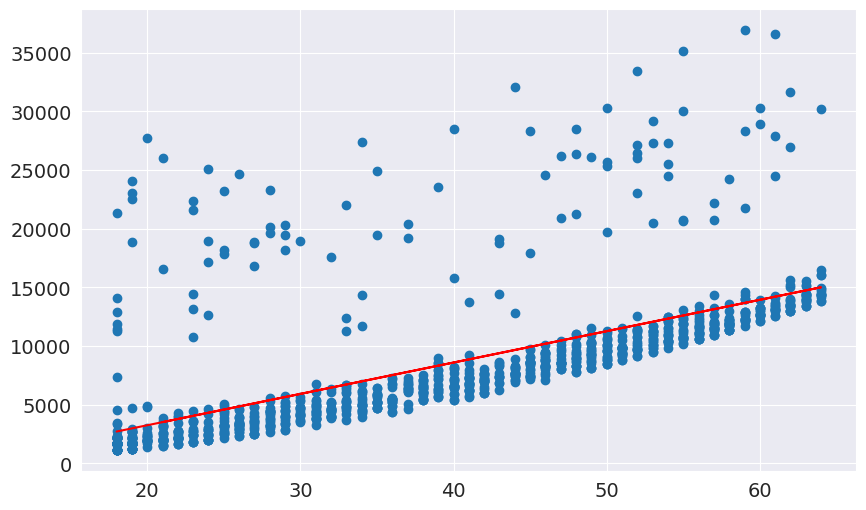

In [ ]:
try_parameters(model.coef_,model.intercept_)

In [ ]:
smokers_df=medical_df[medical_df.smoker=='yes']
targets=smokers_df.charges
inputs=smokers_df[['age','bmi','children']]
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
rmse(predictions,targets)
# plt.plot(smokers_df.age,predictions,color='red')
# plt.scatter(smokers_df.age,targets)

np.float64(5718.202480524154)

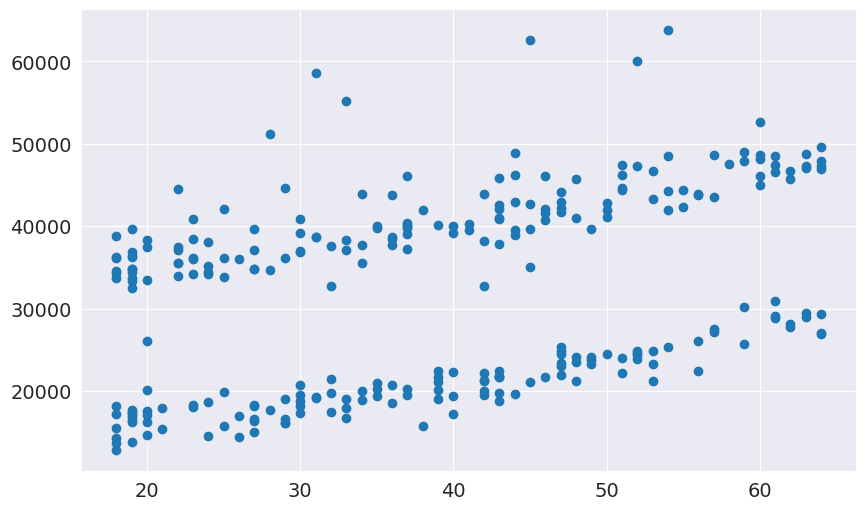

In [ ]:
plt.scatter(smokers_df.age,smokers_df.charges)
# plt.plot(smokers_df.age,predictions,color='red')

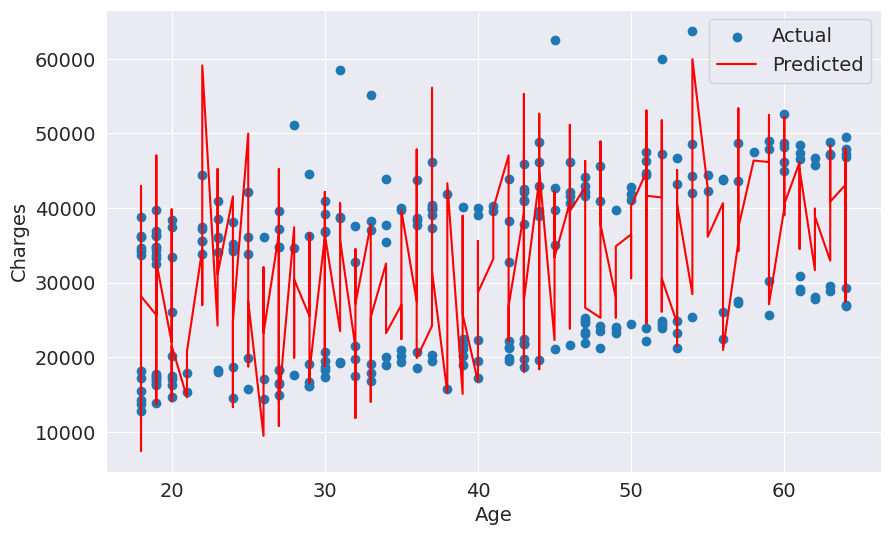

In [ ]:
# Sort by age
sorted_idx = smokers_df.age.argsort()

plt.scatter(smokers_df.age, targets, label="Actual")
plt.plot(smokers_df.age.iloc[sorted_idx], predictions[sorted_idx], color="red", label="Predicted")

plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()


In [ ]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df['smoker'].map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
inputs,targets=medical_df[['age','bmi','children','smoker_code']],medical_df.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
print(f"loss:{rmse(predictions,targets)}")

loss:6056.439217188081


In [ ]:
sex_codes={'female':0,'male':1}
medical_df['sex_code']=medical_df['sex'].map(sex_codes)

In [ ]:
inputs,targets=medical_df[['age','bmi','children','smoker_code','sex_code']],medical_df.charges
model=LinearRegression()
model.fit(inputs,targets)
predictions=model.predict(inputs)
print(f"loss:{rmse(predictions,targets)}")

loss:6056.100708754546


In [ ]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
enc.transform([['northeast']]).toarray()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [ ]:
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
inputs,targets=medical_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']],medical_df.charges
Model=LinearRegression()
Model.fit(inputs,targets)
predictions=Model.predict(inputs)
print(f"Loss:{rmse(predictions,targets)}")

Loss:6041.6796511744515


In [ ]:
non_smoker_df=medical_df[medical_df.smoker=='no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0,0,0.0,0.0,0.0,1.0
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0


In [ ]:
inputs,targets=non_smoker_df[['age','bmi','children','sex_code','northeast','northwest','southeast','southwest']],non_smoker_df.charges
model=LinearRegression()
model.fit(inputs,targets)
predictions=model.predict(inputs)
print(f"Loss:{rmse(predictions,targets)}")

Loss:4573.074988795492


In [ ]:
smokers_df=medical_df[medical_df.smoker=='yes']
smokers_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
11,62,female,26.290,0,yes,southeast,27808.72510,1,0,0.0,0.0,1.0,0.0
14,27,male,42.130,0,yes,southeast,39611.75770,1,1,0.0,0.0,1.0,0.0
19,30,male,35.300,0,yes,southwest,36837.46700,1,1,0.0,0.0,0.0,1.0
23,34,female,31.920,1,yes,northeast,37701.87680,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,1,0,0.0,0.0,0.0,1.0
1314,30,female,23.655,3,yes,northwest,18765.87545,1,0,0.0,1.0,0.0,0.0
1321,62,male,26.695,0,yes,northeast,28101.33305,1,1,1.0,0.0,0.0,0.0
1323,42,female,40.370,2,yes,southeast,43896.37630,1,0,0.0,0.0,1.0,0.0


In [ ]:
inputs,targets=smokers_df[['age','bmi','children','sex_code','northeast','northwest','southeast','southwest']],smokers_df.charges
model=LinearRegression()
model.fit(inputs,targets)
predictions=model.predict(inputs)
print(f"Loss:{rmse(predictions,targets)}")

Loss:5668.4678821121515


In [ ]:
print(Model.coef_)
print(Model.intercept_)

[  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
-12525.547811195444


In [ ]:
weight_df=pd.DataFrame({
    'feature':np.append(inputs.columns.values,'intercept'),
    'weight':np.append(Model.coef_,Model.intercept_)
})
weight_df

In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_cols=['age','bmi','children']
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [89]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [90]:
scaled_inputs=scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [92]:
cat_cols=['smoker_code','sex_code','northeast','northwest','southeast','southwest']
cat_inputs=medical_df[cat_cols]

In [93]:
inputs=np.concatenate([scaled_inputs,cat_inputs],axis=1)
targets=medical_df.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
print(f"Loss:{rmse(predictions,targets)}")

Loss:6041.6796511744515


In [95]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [99]:
def predict_premium(age, bmi, children, smoker, sex, region):
    smoker_code = 1 if smoker=='yes' else 0
    sex_code = 1 if sex=='male' else 0
    region_dict = {'northeast':[1,0,0,0],'northwest':[0,1,0,0],'southeast':[0,0,1,0],'southwest':[0,0,0,1]}
    region_code = region_dict[region]
    row = np.array([[age, bmi, children, smoker_code, sex_code] + region_code])
    return model.predict(row)[0]

In [100]:
predict_premium(30, 28, 2, 'yes', 'male', 'northeast')


np.float64(200036.26618229516)

Conclusion
- Smoking is the most significant factor affecting insurance charges.
- BMI and Age also strongly influence premium values.
- The Linear Regression model can be used to estimate insurance premiums for new applicants.
